In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

from functions.eval import *
from functions.cbi import *
from functions.utils import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
nruns = 10
imputer = MissForest(criterion = ('mse', 'gini'), random_state = 0)
missing_rates = np.arange(1, 5)*0.2
test_size = 0.4

In [3]:
data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.train', header = None,sep=',')
data.head()
test = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test',
                     header=None, sep = ',')
data = pd.concat([data, test])
data = data.to_numpy()
X,y = data[:,1:], data[:,0]
G = len(np.unique(y))
print(np.shape(X))
X = X.astype('float')
for g in range(G):
  print(sum(y==g))
X.shape

(267, 44)
55
212


(267, 44)

In [4]:
def one_run(X, y, imputer = MissForest(), classifier = RandomForestClassifier(),
            test_size = 0.4, missing_rate = 0.8, cat_vars = None):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size)
 
    # Introduce missing data to X_train
    X_train_missing = introduce_missing_data(X_train.copy(), missing_rate)
    
    X_train_cbi, y_train_cbi = cbi_train(X_train, y_train, cat_vars, imputer)
    classifier.fit(X_train_cbi, y_train)    
    accuracy_cbi = accuracy_score(y_test, classifier.predict(X_test))        
    
    
    X_train_imputed = imputer.fit_transform(X_train_missing, cat_vars = cat_vars)
    classifier.fit(X_train_imputed, y_train)    
    accuracy_imputed = accuracy_score(y_test, classifier.predict(X_test))        
    
    return accuracy_cbi, accuracy_imputed

In [5]:
res_all = []
for missing_rate in missing_rates:
    res = np.array([one_run(X, y, imputer = imputer, classifier = RandomForestClassifier(),
                test_size = test_size, missing_rate = missing_rate) for i in range(nruns)])
    res = np.array([np.mean(res, axis = 0)]).flatten().round(3)
    print("result at missing rate", missing_rate, "\n", res)
    res_all.append(res)   

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
result at missing rate 0.2 
 [0.813 0.809]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteratio

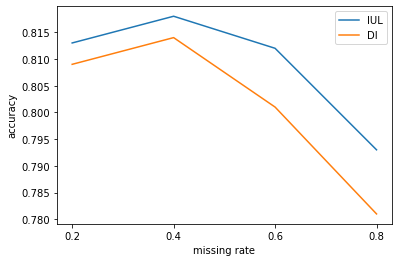

In [6]:
from matplotlib import pyplot as plt
df = pd.DataFrame(np.asarray(res_all), columns = ['IUL', 'DI'], index = missing_rates)
plot = df.plot()
plot.set_xlabel("missing rate")
plot.set_ylabel("accuracy")
plt.xticks(missing_rates)
plot.get_figure().savefig("heart.png")